In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

On a chargé les modules dont on va avoir besoin. Chargeons la base de données. Nous prendrons le jeu de données des fleurs d'iris fournis par scikit-learn.

In [42]:
iris = datasets.load_iris()
X = iris.data
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


On va rajouter les noms des colonnes.

In [43]:
X.columns = [i.replace(' ', '_')[:-5] for i in iris.feature_names]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C'est beaucoup mieux. Entraînons maintenant un algorithme k-means.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


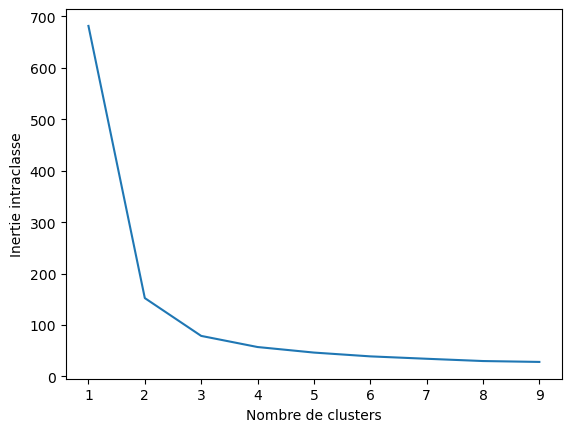

In [44]:
inertia_list = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1,10), inertia_list)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intraclasse")
plt.show()

Au vu de ce graphe, on va se contenter de 3 clusters.

In [46]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

Rajoutons la nouvelle information à notre base de données.

In [55]:
first_chars = ['a', 'b', 'c']
list_of_labels = [first_chars[i] for i in kmeans.labels_]
X["Cluster_3means"] = list_of_labels
X.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,Cluster_3means
129,7.2,3.0,5.8,1.6,c
91,6.1,3.0,4.6,1.4,b
146,6.3,2.5,5.0,1.9,b
110,6.5,3.2,5.1,2.0,c
118,7.7,2.6,6.9,2.3,c


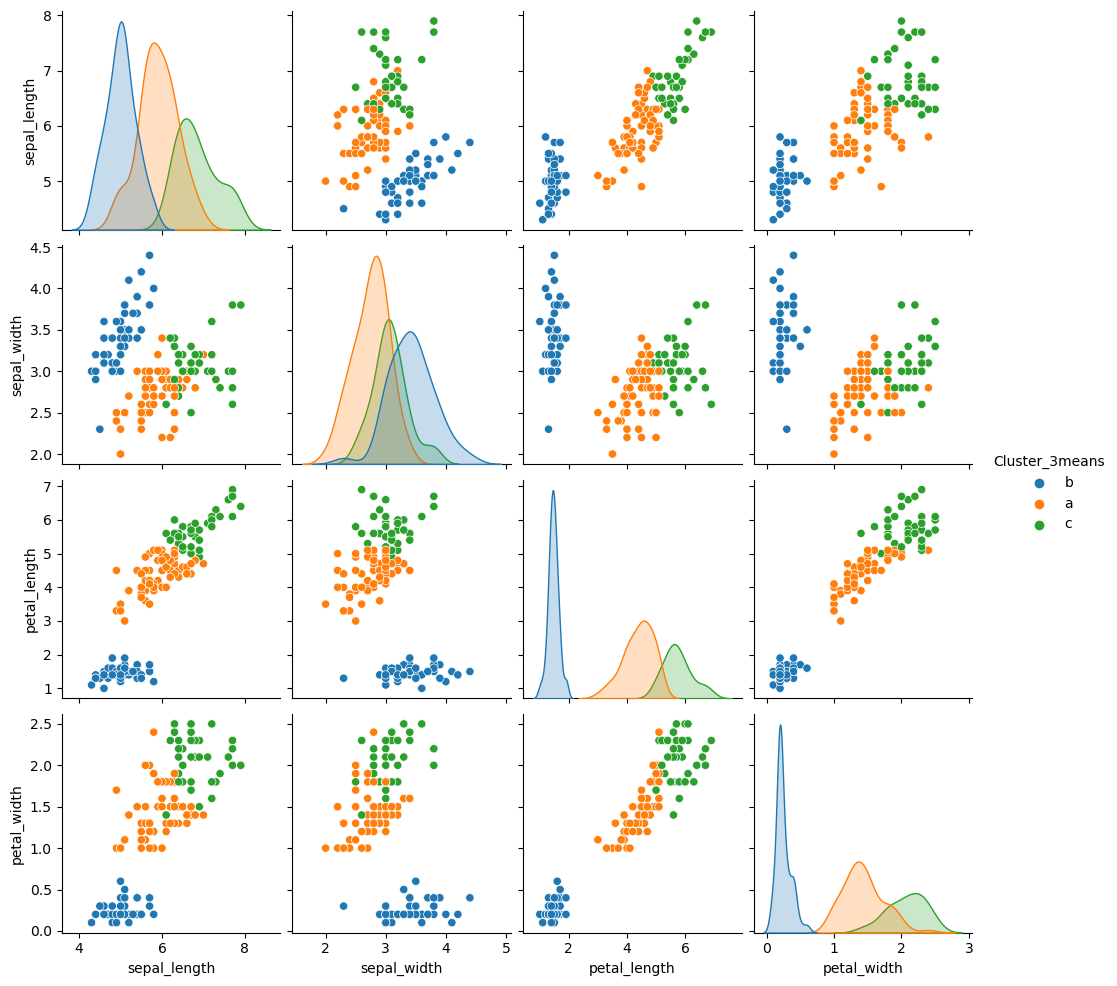

In [39]:
sns.pairplot(X, hue="Cluster_3means")
plt.show()

On va désormais réaliser une classification hiérarchique. On commence par supprimer l'ancienne classification.

In [56]:
X.drop(columns = ["Cluster_3means"], inplace=True)

In [57]:
Z = linkage(X, method="ward")

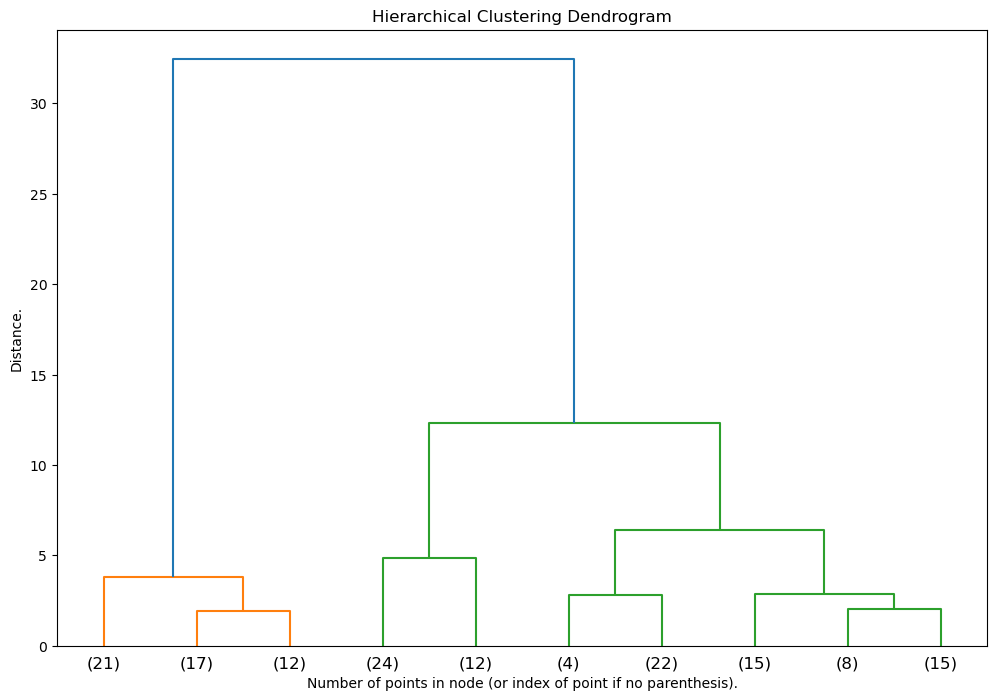

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()